### Prophet

In [1]:
import pandas as pd

In [4]:
from prophet import Prophet

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
train_data = pd.read_csv('snp_phophet_train.csv')
test_data = pd.read_csv('snp_phophet_test.csv')

In [7]:
train_data

,ds,stock,y
0,2018-01-02,A,0.000608
1,2018-01-03,A,0.025444
2,2018-01-04,A,-0.007501
3,2018-01-05,A,0.015988
4,2018-01-08,A,0.002146
...,...,...,...
547259,2022-04-21,ZTS,-0.016296
547260,2022-04-22,ZTS,-0.014996
547261,2022-04-25,ZTS,-0.009068
547262,2022-04-26,ZTS,-0.018469


In [8]:
prophet_models = {}

In [7]:
for stock in train_data['stock'].unique():
    # Filter data for the specific stock
    df_stock = train_data[train_data['stock'] == stock]

    # Create a new Prophet model for the stock
    model = Prophet()

    # Fit the model to the stock's data
    model.fit(df_stock)

    # Store the fitted model in the dictionary
    prophet_models[stock] = model

08:53:59 - cmdstanpy - INFO - Chain [1] start processing
08:53:59 - cmdstanpy - INFO - Chain [1] done processing
08:53:59 - cmdstanpy - INFO - Chain [1] start processing
08:53:59 - cmdstanpy - INFO - Chain [1] done processing
08:53:59 - cmdstanpy - INFO - Chain [1] start processing
08:53:59 - cmdstanpy - INFO - Chain [1] done processing
08:54:00 - cmdstanpy - INFO - Chain [1] start processing
08:54:00 - cmdstanpy - INFO - Chain [1] done processing
08:54:00 - cmdstanpy - INFO - Chain [1] start processing
08:54:00 - cmdstanpy - INFO - Chain [1] done processing
08:54:00 - cmdstanpy - INFO - Chain [1] start processing
08:54:00 - cmdstanpy - INFO - Chain [1] done processing
08:54:00 - cmdstanpy - INFO - Chain [1] start processing
08:54:00 - cmdstanpy - INFO - Chain [1] done processing
08:54:00 - cmdstanpy - INFO - Chain [1] start processing
08:54:00 - cmdstanpy - INFO - Chain [1] done processing
08:54:00 - cmdstanpy - INFO - Chain [1] start processing
08:54:01 - cmdstanpy - INFO - Chain [1]

predictions

In [17]:
stock_list =[]
for x in test_data['stock'].unique():
    stock_list.append(x)

In [42]:
# Initialize a DataFrame to store the Prophet predictions
prophet_pred = pd.DataFrame(columns=['Stock', 'MAE', 'RMSE'])

In [45]:
prophet_pred = pd.DataFrame(columns=['Stock', 'MAE', 'RMSE'])

for stock in stock_list:
    df_stock_test = test_data[test_data['stock'] == stock]
    model = prophet_models[stock]
    future = model.make_future_dataframe(periods=len(df_stock_test))
    forecast = model.predict(future)
    predicted_values = forecast[['ds', 'yhat']].tail(len(df_stock_test))
    actual_values = test_data[['ds', 'y']]
    actual_values['ds'] = pd.to_datetime(actual_values['ds'])
   
    evaluation_df = pd.merge(actual_values, predicted_values, on='ds', suffixes=('_actual', '_predicted'))
    
    # if evaluation_df.empty:
    #     continue  # Skip calculation if evaluation_df is empty
    
    mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
    rmse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'], squared=False)
    
    prophet_pred = prophet_pred.append({'Stock': stock, 'MAE': mae, 'RMSE': rmse}, ignore_index=True)
    


/tmp/ipykernel_5836/2216906520.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_values['ds'] = pd.to_datetime(actual_values['ds'])
/tmp/ipykernel_5836/2216906520.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prophet_pred = prophet_pred.append({'Stock': stock, 'MAE': mae, 'RMSE': rmse}, ignore_index=True)
/tmp/ipykernel_5836/2216906520.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_values['

In [46]:
prophet_pred

,Stock,MAE,RMSE
0,A,0.016931,0.023581
1,AAL,0.017655,0.024358
2,AAP,0.017036,0.023687
3,AAPL,0.017210,0.023810
4,ABBV,0.017165,0.023788
...,...,...,...
498,YUM,0.016957,0.023524
499,ZBH,0.017012,0.023578
500,ZBRA,0.016820,0.023477
501,ZION,0.016957,0.023567


In [ ]:
prophet_pred.to_csv('prophet_pred.csv',index=False)

### AutoTS

In [18]:
train_data = pd.read_csv('snp_AT_train.csv',index_col=0)
test_data = pd.read_csv('snp_AT_test.csv',index_col=0)

In [19]:
train_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000608,-0.000219,0.000328,0.001294,0.000584,0.000653,0.000609,0.000856,0.000729,0.000906,...,0.000289,0.000440,0.000576,-0.000172,0.000517,0.000532,0.000255,0.001032,0.000078,0.000774
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,-0.031537,0.037988,-0.010789,-0.004844,0.011614,-0.004284,0.005952,-0.014211,-0.004202,-0.024830,...,-0.029968,-0.000663,-0.010573,-0.018652,-0.003687,-0.010024,-0.016362,-0.021033,-0.045845,-0.016296
2022-04-22,-0.031687,-0.001978,-0.031788,-0.027821,-0.022268,-0.036480,-0.030234,-0.039391,-0.035711,-0.021103,...,-0.029435,-0.013280,-0.021831,-0.027085,-0.020930,-0.016394,-0.045268,-0.030920,-0.023944,-0.014996
2022-04-25,0.001072,-0.009911,0.025093,0.006737,0.008452,-0.003333,0.003093,-0.012260,0.019369,0.012920,...,-0.013525,-0.008075,-0.033713,0.014164,-0.007323,-0.009232,0.016786,0.028996,0.005762,-0.009068


In [24]:
test_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,0.028722,0.024249,-0.068881,0.045155,-0.008311,0.001842,0.011052,-0.024411,0.035434,0.031742,...,0.041060,0.026175,0.030246,-0.002482,0.015833,0.022412,0.014079,0.031985,0.035351,0.015913
2022-04-29,-0.014786,-0.033968,-0.046612,-0.036605,-0.060329,-0.040951,-0.038217,-0.023311,-0.042952,-0.035515,...,-0.003675,-0.021635,-0.022362,-0.004976,-0.034888,-0.021001,-0.030977,-0.034780,-0.025522,-0.022393
2022-05-02,0.002515,-0.011188,0.004308,0.001966,0.006740,-0.015335,-0.005903,0.004598,0.014117,0.028640,...,0.017452,-0.008054,0.013607,-0.008502,0.016522,-0.010683,-0.000828,0.026808,0.008848,-0.014556
2022-05-03,0.023668,0.030711,-0.002843,0.009623,0.011699,0.012016,-0.003545,0.011988,0.000722,0.000712,...,-0.000279,-0.007431,0.020599,0.025977,0.006599,-0.005961,0.000249,-0.030113,0.008069,0.002691
2022-05-04,0.031863,0.025614,0.038566,0.041008,0.013302,0.039997,0.029085,0.018953,0.032937,0.038692,...,0.003766,0.017607,0.039800,0.031219,0.096273,0.029721,0.046735,-0.000733,0.034975,0.009821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [20]:
train_data.index=pd.to_datetime(train_data.index)

In [21]:
test_data.index=pd.to_datetime(test_data.index)

In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from autots import AutoTS

# Initialize a DataFrame to store the performance measurements
autots_pred = pd.DataFrame(columns=['Stock', 'MAE', 'RMSE'])

# Create a new AutoTS model
model = AutoTS(
    forecast_length=len(test_data),
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="superfast",
    transformer_list="superfast",
    drop_most_recent=1,
    max_generations=3,
    num_validations=2,
    validation_method="backwards"
)

# Fit the AutoTS model
model = model.fit(train_data)




Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model GLS in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 5 with model GLS in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 6 with model LastValueNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 7 with model LastValueNaive in generation 0 of 3
Model Number: 8 with model LastValueNaive in generation 0 of 3
Model Number: 9 with model LastValueNaive in generation 0 of 3
Model Number: 10 with model SeasonalNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 11 with model SeasonalNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 12 with model SeasonalNaive in generation 0 of 3
Model Number: 13 with model ConstantNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 14 with model SeasonalNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 15 with model SeasonalNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 16 with model ConstantNaive in generation 0 of 3
Model Number: 17 with model LastValueNaive in generation 0 of 3
Model Number: 18 with model AverageValueNaive in generation 0 of 3
Model Number: 19 with model GLS in generation 0 of 3
Model Number: 20 with model SeasonalNaive in generation 0 of 3
Model Number: 21 with model SeasonalityMotif in generation 0 of 3
Model Number: 22 with model GLS in generation 0 of 3
Model Number: 23 with model LastValueNaive in generation 0 of 3
Model Number: 24 with model AverageValueNaive in generation 0 of 3
Model Number: 25 with model LastValueNaive in generation 0 of 3
Model Number: 26 with model SeasonalNaive in generation 0 of 3
Model Number: 27 with model AverageValueNaive in generation 0 of 3
Model Number: 28 with model ConstantNaive in generation 0 of 3
Model Number: 29 with model SeasonalityMotif in generation 0 of 3
Model Number: 30 with model SeasonalNaive in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 31 with model LastValueNaive in generation 0 of 3
Model Number: 32 with model ConstantNaive in generation 0 of 3
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'AlignLastValue', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 32 in generation 0: ConstantNaive
Model Number: 33 with model LastValueNaive in generation 0 of 3
Model Number: 34 with model AverageValueNaive in generation 0 of 3
Model Number: 35 with model SeasonalityMotif in generation 0 of 3
Model Number: 36 with mo

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 38 with model ConstantNaive in generation 0 of 3
Model Number: 39 with model AverageValueNaive in generation 0 of 3
Model Number: 40 with model SeasonalNaive in generation 0 of 3
Model Number: 41 with model AverageValueNaive in generation 0 of 3
Model Number: 42 with model GLS in generation 0 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 43 with model SeasonalityMotif in generation 0 of 3
Model Number: 44 with model ConstantNaive in generation 0 of 3
Model Number: 45 with model SeasonalityMotif in generation 0 of 3
New Generation: 1 of 3
Model Number: 46 with model SeasonalNaive in generation 1 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 47 with model LastValueNaive in generation 1 of 3
Model Number: 48 with model SeasonalityMotif in generation 1 of 3
Model Number: 49 with model ConstantNaive in generation 1 of 3
Model Number: 50 with model SeasonalityMotif in generation 1 of 3
Model Number: 51 with model GLS in generation 1 of 3
Model Number: 52 with model SeasonalityMotif in generation 1 of 3
Model Number: 53 with model SeasonalityMotif in generation 1 of 3
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 53 in generation 1: SeasonalityMotif
Model Number: 54 with model SeasonalityMotif in generation 1 of 3
Model Number: 55 with model AverageValueNaive in generation 1 of 3
Model Number: 56 with model SeasonalityMotif in generation 1 of 3
Model Number: 57 with model LastValueNaive in generation 1 of 3
Model Number: 58 with model SeasonalNaive in generation 1 of 3
Model Number: 59 with model ConstantNaive in generation 1 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 60 with model SeasonalNaive in generation 1 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 61 with model ConstantNaive in generation 1 of 3
Model Number: 62 with model SeasonalNaive in generation 1 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 63 with model ConstantNaive in generation 1 of 3
Model Number: 64 with model AverageValueNaive in generation 1 of 3
Model Number: 65 with model AverageValueNaive in generation 1 of 3
Model Number: 66 with model AverageValueNaive in generation 1 of 3
Model Number: 67 with model LastValueNaive in generation 1 of 3
Model Number: 68 with model LastValueNaive in generation 1 of 3
Model Number: 69 with model SeasonalNaive in generation 1 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 70 with model ConstantNaive in generation 1 of 3
Model Number: 71 with model LastValueNaive in generation 1 of 3
Model Number: 72 with model AverageValueNaive in generation 1 of 3
Model Number: 73 with model SeasonalNaive in generation 1 of 3
Model Number: 74 with model GLS in generation 1 of 3
Model Number: 75 with model SeasonalNaive in generation 1 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


New Generation: 2 of 3
Model Number: 76 with model LastValueNaive in generation 2 of 3
Model Number: 77 with model AverageValueNaive in generation 2 of 3
Model Number: 78 with model AverageValueNaive in generation 2 of 3
Model Number: 79 with model SeasonalNaive in generation 2 of 3
Model Number: 80 with model AverageValueNaive in generation 2 of 3
Model Number: 81 with model SeasonalNaive in generation 2 of 3
Model Number: 82 with model SeasonalityMotif in generation 2 of 3
Model Number: 83 with model SeasonalityMotif in generation 2 of 3
Model Number: 84 with model GLS in generation 2 of 3
Model Number: 85 with model ConstantNaive in generation 2 of 3
Model Number: 86 with model AverageValueNaive in generation 2 of 3
Model Number: 87 with model SeasonalityMotif in generation 2 of 3
Model Number: 88 with model LastValueNaive in generation 2 of 3
Model Number: 89 with model LastValueNaive in generation 2 of 3
Model Number: 90 with model SeasonalNaive in generation 2 of 3
Model Number: 

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 94 with model SeasonalNaive in generation 2 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 95 with model SeasonalityMotif in generation 2 of 3
Model Number: 96 with model SeasonalityMotif in generation 2 of 3
Model Number: 97 with model SeasonalNaive in generation 2 of 3
Model Number: 98 with model SeasonalNaive in generation 2 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 99 with model AverageValueNaive in generation 2 of 3
Model Number: 100 with model LastValueNaive in generation 2 of 3
Model Number: 101 with model GLS in generation 2 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 102 with model SeasonalNaive in generation 2 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 103 with model ConstantNaive in generation 2 of 3
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 103 in generation 2: ConstantNaive
Model Number: 104 with model LastValueNaive in generation 2 of 3
Model Number: 105 with model SeasonalNaive in generation 2 of 3
New Generation: 3 of 3
Model Number: 106 with model SeasonalityMotif in generation 3 of 3
Model Number: 107 with model GLS in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 108 with model SeasonalNaive in generation 3 of 3
Model Number: 109 with model GLS in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 110 with model AverageValueNaive in generation 3 of 3
Model Number: 111 with model SeasonalNaive in generation 3 of 3
Model Number: 112 with model SeasonalityMotif in generation 3 of 3
Model Number: 113 with model SeasonalityMotif in generation 3 of 3
Model Number: 114 with model SeasonalityMotif in generation 3 of 3
Model Number: 115 with model ConstantNaive in generation 3 of 3
Model Number: 116 with model SeasonalityMotif in generation 3 of 3
Model Number: 117 with model AverageValueNaive in generation 3 of 3
Model Number: 118 with model AverageValueNaive in generation 3 of 3
Model Number: 119 with model AverageValueNaive in generation 3 of 3
Model Number: 120 with model AverageValueNaive in generation 3 of 3
Model Number: 121 with model AverageValueNaive in generation 3 of 3
Model Number: 122 with model SeasonalNaive in generation 3 of 3
Model Number: 123 with model GLS in generation 3 of 3
Model Number: 124 with model SeasonalNaive in generation 3 of 3
Model Number: 

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 126 with model SeasonalNaive in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:66: RuntimeWarning: invalid value encountered in true_divide
  post_mu = (


Model Number: 127 with model GLS in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 128 with model AverageValueNaive in generation 3 of 3
Model Number: 129 with model GLS in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 130 with model SeasonalityMotif in generation 3 of 3
Model Number: 131 with model SeasonalityMotif in generation 3 of 3
Model Number: 132 with model SeasonalNaive in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 133 with model GLS in generation 3 of 3


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 134 with model LastValueNaive in generation 3 of 3
Model Number: 135 with model SeasonalityMotif in generation 3 of 3
Validation Round: 1
Model Number: 1 of 21 with model SeasonalityMotif for Validation 1
📈 1 - SeasonalityMotif with avg smape 152.09: 
Model Number: 2 of 21 with model SeasonalityMotif for Validation 1
2 - SeasonalityMotif with avg smape 152.28: 
Model Number: 3 of 21 with model SeasonalityMotif for Validation 1
📈 3 - SeasonalityMotif with avg smape 149.31: 
Model Number: 4 of 21 with model SeasonalityMotif for Validation 1
4 - SeasonalityMotif with avg smape 150.02: 
Model Number: 5 of 21 with model SeasonalityMotif for Validation 1
5 - SeasonalityMotif with avg smape 150.9: 
Model Number: 6 of 21 with model SeasonalNaive for Validation 1
📈 6 - SeasonalNaive with avg smape 147.34: 
Model Number: 7 of 21 with model SeasonalNaive for Validation 1
7 - SeasonalNaive with avg smape 149.2: 
Model Number: 8 of 21 with model AverageValueNaive for Validation 1
8 - 

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


11 - SeasonalNaive with avg smape 164.54: 
Model Number: 12 of 21 with model SeasonalNaive for Validation 1
12 - SeasonalNaive with avg smape 160.82: 
Model Number: 13 of 21 with model AverageValueNaive for Validation 1
13 - AverageValueNaive with avg smape 169.53: 
Model Number: 14 of 21 with model AverageValueNaive for Validation 1
14 - AverageValueNaive with avg smape 164.96: 
Model Number: 15 of 21 with model GLS for Validation 1


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


15 - GLS with avg smape 167.94: 
Model Number: 16 of 21 with model GLS for Validation 1


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


16 - GLS with avg smape 171.07: 
Model Number: 17 of 21 with model SeasonalNaive for Validation 1


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


17 - SeasonalNaive with avg smape 147.61: 
Model Number: 18 of 21 with model GLS for Validation 1


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


18 - GLS with avg smape 174.8: 
Model Number: 19 of 21 with model GLS for Validation 1


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 19 - GLS with avg smape 147.26: 
Model Number: 20 of 21 with model GLS for Validation 1


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 20 - GLS with avg smape 143.97: 
Model Number: 21 of 21 with model LastValueNaive for Validation 1
21 - LastValueNaive with avg smape 149.1: 
Validation Round: 2
Model Number: 1 of 21 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 163.74: 
Model Number: 2 of 21 with model SeasonalityMotif for Validation 2
📈 2 - SeasonalityMotif with avg smape 160.97: 
Model Number: 3 of 21 with model SeasonalityMotif for Validation 2
📈 3 - SeasonalityMotif with avg smape 159.49: 
Model Number: 4 of 21 with model SeasonalityMotif for Validation 2
📈 4 - SeasonalityMotif with avg smape 158.38: 
Model Number: 5 of 21 with model SeasonalityMotif for Validation 2
5 - SeasonalityMotif with avg smape 160.58: 
Model Number: 6 of 21 with model SeasonalNaive for Validation 2
📈 6 - SeasonalNaive with avg smape 151.5: 
Model Number: 7 of 21 with model SeasonalNaive for Validation 2
7 - SeasonalNaive with avg smape 160.18: 
Model Number: 8 of 21 with model AverageValueNaive for 

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


11 - SeasonalNaive with avg smape 171.62: 
Model Number: 12 of 21 with model SeasonalNaive for Validation 2
12 - SeasonalNaive with avg smape 169.36: 
Model Number: 13 of 21 with model AverageValueNaive for Validation 2
13 - AverageValueNaive with avg smape 175.46: 
Model Number: 14 of 21 with model AverageValueNaive for Validation 2
14 - AverageValueNaive with avg smape 173.56: 
Model Number: 15 of 21 with model GLS for Validation 2


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


15 - GLS with avg smape 174.41: 
Model Number: 16 of 21 with model GLS for Validation 2


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


16 - GLS with avg smape 176.92: 
Model Number: 17 of 21 with model SeasonalNaive for Validation 2


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


17 - SeasonalNaive with avg smape 165.68: 
Model Number: 18 of 21 with model GLS for Validation 2


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


18 - GLS with avg smape 181.07: 
Model Number: 19 of 21 with model GLS for Validation 2


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 19 - GLS with avg smape 144.28: 
Model Number: 20 of 21 with model GLS for Validation 2


/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


20 - GLS with avg smape 150.97: 
Model Number: 21 of 21 with model LastValueNaive for Validation 2
21 - LastValueNaive with avg smape 145.69: 


predictions

In [41]:
prediction = model.predict()

In [42]:
forecasts_df = prediction.forecast

In [45]:
forecasts_df.index=test_data.index

In [44]:
test_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,0.028722,0.024249,-0.068881,0.045155,-0.008311,0.001842,0.011052,-0.024411,0.035434,0.031742,...,0.041060,0.026175,0.030246,-0.002482,0.015833,0.022412,0.014079,0.031985,0.035351,0.015913
2022-04-29,-0.014786,-0.033968,-0.046612,-0.036605,-0.060329,-0.040951,-0.038217,-0.023311,-0.042952,-0.035515,...,-0.003675,-0.021635,-0.022362,-0.004976,-0.034888,-0.021001,-0.030977,-0.034780,-0.025522,-0.022393
2022-05-02,0.002515,-0.011188,0.004308,0.001966,0.006740,-0.015335,-0.005903,0.004598,0.014117,0.028640,...,0.017452,-0.008054,0.013607,-0.008502,0.016522,-0.010683,-0.000828,0.026808,0.008848,-0.014556
2022-05-03,0.023668,0.030711,-0.002843,0.009623,0.011699,0.012016,-0.003545,0.011988,0.000722,0.000712,...,-0.000279,-0.007431,0.020599,0.025977,0.006599,-0.005961,0.000249,-0.030113,0.008069,0.002691
2022-05-04,0.031863,0.025614,0.038566,0.041008,0.013302,0.039997,0.029085,0.018953,0.032937,0.038692,...,0.003766,0.017607,0.039800,0.031219,0.096273,0.029721,0.046735,-0.000733,0.034975,0.009821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [47]:
forecasts_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,0.004144,0.006219,0.000226,0.015581,-0.000058,-0.002377,-0.002932,-4.173355e-03,0.003961,0.002559,...,0.014775,-0.004984,0.006359,0.003782,-0.003310,-0.010585,0.005317,-0.000503,-0.001777,-0.002255
2022-04-29,0.001897,-0.007549,0.000157,0.006465,-0.001814,0.002201,0.001201,-7.100435e-03,0.001888,0.005932,...,-0.007866,-0.002620,-0.005325,-0.004022,-0.005629,0.002105,-0.002010,-0.004632,0.000458,0.010304
2022-05-02,-0.000290,-0.009704,-0.009239,0.003032,0.002306,-0.002065,0.000280,-4.721687e-03,-0.004491,-0.000584,...,-0.005710,-0.001309,-0.011684,0.007812,-0.000780,-0.004089,-0.000847,-0.003937,-0.002613,0.001030
2022-05-03,0.000037,-0.004327,0.000850,0.001399,0.000417,-0.002366,-0.001001,-1.880175e-03,-0.002487,0.003510,...,-0.000339,-0.000842,-0.006337,0.003652,-0.000536,-0.001642,-0.001494,0.000417,-0.000461,-0.000714
2022-05-04,0.001926,0.000823,0.000673,0.001102,0.003775,0.002890,0.001021,1.345007e-03,-0.000254,-0.001531,...,0.002248,0.004149,-0.004197,0.007115,0.004285,0.001899,0.001609,0.002711,0.005330,0.003529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.001098,-0.001379,-0.004649,0.002523,0.000476,0.000669,0.000535,-5.802324e-03,-0.003308,0.000609,...,-0.014733,-0.003559,-0.001503,-0.000483,0.001693,0.000032,0.000152,-0.001920,-0.001047,0.000714
2023-05-24,0.000366,0.001117,0.000214,0.003252,0.003290,0.001008,0.002704,-2.595926e-07,0.000661,0.003739,...,-0.008582,0.000557,0.000905,0.001301,0.002222,0.000074,0.003186,0.001812,-0.000151,0.001214
2023-05-25,0.001066,-0.003592,-0.001139,0.004977,0.000988,0.004045,0.003234,1.119247e-03,-0.000042,0.000602,...,-0.007078,0.001276,0.001942,0.001982,0.002608,0.001300,0.003238,0.000695,0.000986,0.000464


In [48]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for each stock
mae_list = []
rmse_list = []

for column in test_data.columns:
    mae = mean_absolute_error(test_data[column], forecasts_df[column])
    rmse = mean_squared_error(test_data[column], forecasts_df[column], squared=False)
    mae_list.append(mae)
    rmse_list.append(rmse)

# Create performance_df
performance_df = pd.DataFrame({'Stock': test_data.columns, 'MAE': mae_list, 'RMSE': rmse_list})

# Display the performance_df
print(performance_df)


    Stock       MAE      RMSE
0       A  0.016201  0.021406
1     AAL  0.024631  0.031895
2     AAP  0.015724  0.022597
3    AAPL  0.016119  0.021377
4    ABBV  0.010645  0.014532
..    ...       ...       ...
498   YUM  0.010393  0.013538
499   ZBH  0.012546  0.016684
500  ZBRA  0.021320  0.028993
501  ZION  0.023647  0.035797
502   ZTS  0.014756  0.019252

[503 rows x 3 columns]


In [49]:
performance_df.to_csv('AT_pred.csv',index=False)

### comparison of AUTOTS and ProPHET

In [50]:
auto=pd.read_csv('/home/ubuntu/Projects/TS_model/TM_Model/prophet_pred.csv',index_col=0)
pro=pd.read_csv('/home/ubuntu/Projects/TS_model/TM_Model/AT_pred.csv',index_col=0)

In [51]:
auto

,MAE,RMSE
Stock,,
A,0.016931,0.023581
AAL,0.017655,0.024358
AAP,0.017036,0.023687
AAPL,0.017210,0.023810
ABBV,0.017165,0.023788
...,...,...
YUM,0.016957,0.023524
ZBH,0.017012,0.023578
ZBRA,0.016820,0.023477


In [52]:
pro

,MAE,RMSE
Stock,,
A,0.016201,0.021406
AAL,0.024631,0.031895
AAP,0.015724,0.022597
AAPL,0.016119,0.021377
ABBV,0.010645,0.014532
...,...,...
YUM,0.010393,0.013538
ZBH,0.012546,0.016684
ZBRA,0.021320,0.028993


In [54]:
import matplotlib.pyplot as plt

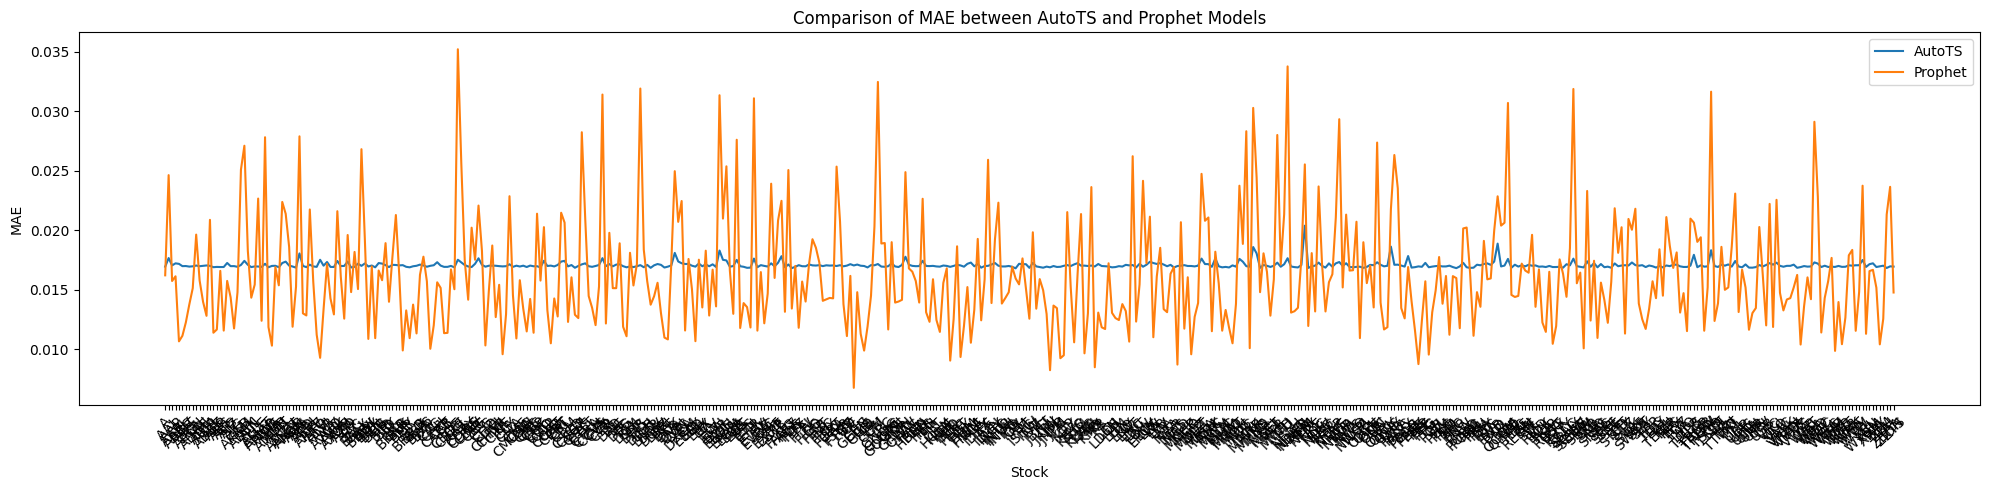

In [56]:
# Plotting MAE
plt.figure(figsize=(20, 5))
plt.plot(auto['MAE'], label='AutoTS')
plt.plot(pro['MAE'], label='Prophet')
plt.xlabel('Stock')
plt.ylabel('MAE')
plt.title('Comparison of MAE between AutoTS and Prophet Models')
plt.legend()
plt.xticks(range(len(auto['MAE'])), rotation=45)
plt.tight_layout()
plt.show()

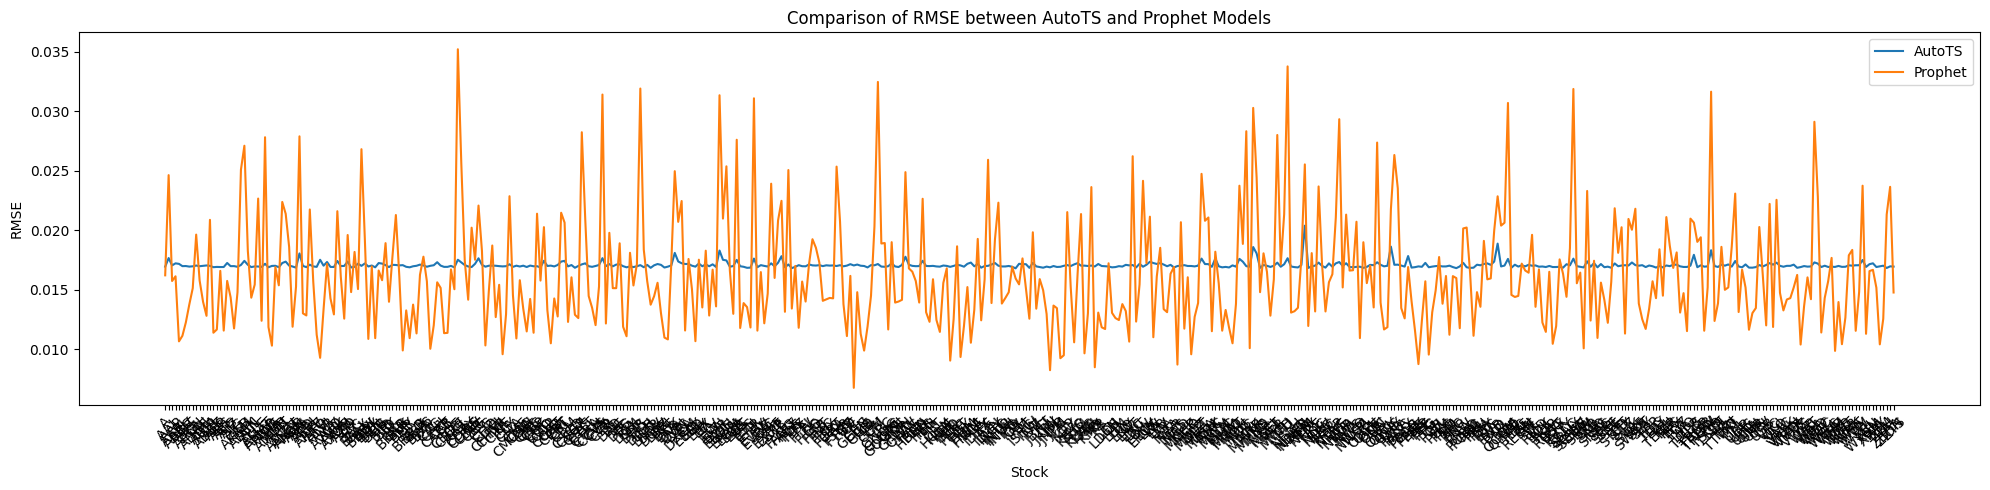

In [57]:
# Plotting RMSE
plt.figure(figsize=(20, 5))
plt.plot(auto['MAE'], label='AutoTS')
plt.plot(pro['MAE'], label='Prophet')
plt.xlabel('Stock')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between AutoTS and Prophet Models')
plt.legend()
plt.xticks(range(len(auto['MAE'])), rotation=45)
plt.tight_layout()
plt.show()

### ETNA

In [30]:
from etna.datasets import TSDataset

In [31]:
df=pd.read_csv('ETNA_data.csv',index_col=0)

In [32]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000608,-0.000219,0.000328,0.001294,0.000584,0.000653,0.000609,0.000856,0.000729,0.000906,...,0.000289,0.000440,0.000576,-0.000172,0.000517,0.000532,0.000255,0.001032,0.000078,0.000774
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [33]:
df = df.reset_index()
df_transformed = pd.melt(df, id_vars='Date', var_name='segment', value_name='Value')
df_transformed = df_transformed.rename(columns={'Date': 'timestamp'})
df_transformed = df_transformed.rename(columns={'Value': 'target'})
df = TSDataset.to_dataset(df_transformed)
dataset = TSDataset(df, freq=None)

In [34]:
dataset

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000608,-0.000219,0.000328,0.001294,0.000584,0.000653,0.000609,0.000856,0.000729,0.000906,...,0.000289,0.000440,0.000576,-0.000172,0.000517,0.000532,0.000255,0.001032,0.000078,0.000774
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.040581,0.059506,...,0.001089,0.000467,-0.006530,0.001355,-0.002131,0.001581,-0.001174,0.019369,0.012006,-0.003026
2023-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
HORIZON = 273
train_ts, test_ts = dataset.train_test_split(test_size=HORIZON)


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:145: UserWarning: You probably set wrong freq. Discovered freq in you data is D, you set None
  warnings.warn(
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:145: UserWarning: You probably set wrong freq. Discovered freq in you data is D, you set None
  warnings.warn(


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

from etna.datasets.tsdataset import TSDataset
from etna.metrics import MAE
from etna.metrics import MSE
from etna.metrics import SMAPE
from etna.pipeline import Pipeline
from etna.models import ProphetModel
from etna.analysis import plot_backtest

In [37]:
model = ProphetModel()  # Create a model
transforms = []  # A list of transforms -  we will not use any of them


In [38]:
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)

In [39]:
pipeline.fit(train_ts)

15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1] done processing
15:44:16 - cmdstanpy - INFO - Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1] done processing
15:44:16 - cmdstanpy - INFO - Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1] done processing
15:44:16 - cmdstanpy - INFO - Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1] done processing
15:44:16 - cmdstanpy - INFO - Chain [1] start processing
15:44:16 - cmdstanpy - INFO - Chain [1]

Pipeline(model = ProphetModel(growth = 'linear', changepoints = None, n_changepoints = 25, changepoint_range = 0.8, yearly_seasonality = 'auto', weekly_seasonality = 'auto', daily_seasonality = 'auto', holidays = None, seasonality_mode = 'additive', seasonality_prior_scale = 10.0, holidays_prior_scale = 10.0, changepoint_prior_scale = 0.05, mcmc_samples = 0, interval_width = 0.8, uncertainty_samples = 1000, stan_backend = None, additional_seasonality_params = (), ), transforms = [], horizon = 273, )

In [40]:
forecast_ts = pipeline.forecast()

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:277: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:145: UserWarning: You probably set wrong freq. Discovered freq in you data is D, you set None
  warnings.warn(
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:145: UserWarning: You probably set wrong freq. Discovered freq in you data is D, you set None
  warnings.warn(


In [41]:
forecast_ts

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-31,0.002508,0.001822,-0.002388,0.000117,-0.002123,0.000263,0.001101,-0.002562,-0.000109,-0.001760,...,-0.000655,-0.000952,0.001234,-0.000449,0.000846,-0.001222,0.000316,-0.006990,0.000261,-0.004694
2022-09-01,0.003511,-0.001132,-0.002091,-0.003931,-0.003426,-0.000351,0.001445,-0.003178,0.000243,-0.002188,...,-0.004182,-0.000138,-0.000110,-0.002561,-0.000904,-0.000844,-0.000582,-0.007154,-0.001141,-0.001822
2022-09-02,0.002743,-0.001201,-0.003262,-0.004537,-0.001739,0.000766,0.000433,-0.002737,-0.000234,-0.003978,...,-0.004486,-0.000932,0.001234,0.001218,0.002297,-0.002380,0.000713,-0.006146,0.000911,-0.002820
2022-09-03,0.001853,0.002262,-0.001926,-0.002895,-0.003229,0.000737,-0.000564,-0.003080,-0.001189,-0.003861,...,-0.004233,-0.001518,0.002574,-0.000349,0.000954,-0.002592,-0.000316,-0.007169,0.000217,-0.004390
2022-09-04,0.001905,0.002688,-0.001572,-0.003180,-0.003323,0.000780,-0.000589,-0.003202,-0.001322,-0.003995,...,-0.005033,-0.001655,0.002640,-0.000376,0.001246,-0.002777,-0.000263,-0.006837,0.000291,-0.004262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.002306,0.009557,-0.001415,-0.002419,0.000938,0.003779,0.000257,0.006222,0.002909,-0.000210,...,0.000040,0.001015,0.005614,0.001234,0.004874,0.002752,0.000633,0.000123,0.005059,0.002434
2023-05-27,0.001431,0.013447,-0.000439,-0.000258,-0.000626,0.003904,-0.000906,0.005846,0.002056,-0.000022,...,0.001529,0.000242,0.006962,-0.000471,0.003239,0.002665,-0.000429,-0.001145,0.004429,0.000744


In [42]:
test_ts

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-31,-0.000234,-0.025506,-0.010735,-0.010635,-0.008041,0.007770,0.004403,-0.000437,-0.013812,-0.004346,...,0.006311,-0.005891,-0.007476,-0.005161,0.000549,0.004152,-0.009779,-0.004028,-0.006679,-0.003501
2022-09-01,0.005302,-0.004619,0.020814,0.004707,0.029674,0.007164,0.021335,0.000000,0.001144,-0.007792,...,-0.023271,0.015757,-0.017994,-0.018310,0.010867,0.027149,0.004515,0.026853,0.001454,0.018399
2022-09-02,-0.007136,0.004640,-0.002440,-0.013611,-0.015674,0.000678,-0.022320,-0.004812,-0.016344,-0.006450,...,0.000000,-0.013392,0.018323,-0.011501,-0.009556,-0.013303,-0.011517,-0.039194,-0.001270,-0.015244
2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.040581,0.059506,...,0.001089,0.000467,-0.006530,0.001355,-0.002131,0.001581,-0.001174,0.019369,0.012006,-0.003026
2023-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
type(test_ts)

etna.datasets.tsdataset.TSDataset

In [77]:
test_data = test_ts.to_pandas()

In [78]:
test_data.columns = test_data.columns.droplevel('feature')

In [85]:
test_data

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-31,-0.000234,-0.025506,-0.010735,-0.010635,-0.008041,0.007770,0.004403,-0.000437,-0.013812,-0.004346,...,0.006311,-0.005891,-0.007476,-0.005161,0.000549,0.004152,-0.009779,-0.004028,-0.006679,-0.003501
2022-09-01,0.005302,-0.004619,0.020814,0.004707,0.029674,0.007164,0.021335,0.000000,0.001144,-0.007792,...,-0.023271,0.015757,-0.017994,-0.018310,0.010867,0.027149,0.004515,0.026853,0.001454,0.018399
2022-09-02,-0.007136,0.004640,-0.002440,-0.013611,-0.015674,0.000678,-0.022320,-0.004812,-0.016344,-0.006450,...,0.000000,-0.013392,0.018323,-0.011501,-0.009556,-0.013303,-0.011517,-0.039194,-0.001270,-0.015244
2022-09-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-09-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.040581,0.059506,...,0.001089,0.000467,-0.006530,0.001355,-0.002131,0.001581,-0.001174,0.019369,0.012006,-0.003026
2023-05-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [84]:

test_data = test_data.apply(lambda x: x.fillna(0))

In [71]:
forecasts_df=forecast_ts.to_pandas()

In [72]:
forecasts_df.columns = forecasts_df.columns.droplevel('feature')

In [86]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for each stock
mae_list = []
rmse_list = []

for column in test_data.columns:
    mae = mean_absolute_error(test_data[column], forecasts_df[column])
    rmse = mean_squared_error(test_data[column], forecasts_df[column], squared=False)
    mae_list.append(mae)
    rmse_list.append(rmse)

# Create performance_df
performance_df = pd.DataFrame({'Stock': test_data.columns, 'MAE': mae_list, 'RMSE': rmse_list})

# Display the performance_df
print(performance_df)


    Stock       MAE      RMSE
0       A  0.010223  0.015815
1     AAL  0.015440  0.022625
2     AAP  0.010534  0.017360
3    AAPL  0.010560  0.016662
4    ABBV  0.008221  0.012386
..    ...       ...       ...
498   YUM  0.007415  0.010534
499   ZBH  0.008531  0.012767
500  ZBRA  0.015656  0.024139
501  ZION  0.018989  0.033170
502   ZTS  0.010554  0.016331

[503 rows x 3 columns]


In [87]:
performance_df

,Stock,MAE,RMSE
0,A,0.010223,0.015815
1,AAL,0.015440,0.022625
2,AAP,0.010534,0.017360
3,AAPL,0.010560,0.016662
4,ABBV,0.008221,0.012386
...,...,...,...
498,YUM,0.007415,0.010534
499,ZBH,0.008531,0.012767
500,ZBRA,0.015656,0.024139
501,ZION,0.018989,0.033170


In [88]:
performance_df.to_csv('ETNA_pred.csv',index=False)

### Comparison of AutuTS, Prophet, and ETNA

In [89]:
auto=pd.read_csv('prophet_pred.csv',index_col=0)
pro=pd.read_csv('AT_pred.csv',index_col=0)
ETNA = pd.read_csv('ETNA_pred.csv',index_col=0)

In [90]:
auto

,MAE,RMSE
Stock,,
A,0.016931,0.023581
AAL,0.017655,0.024358
AAP,0.017036,0.023687
AAPL,0.017210,0.023810
ABBV,0.017165,0.023788
...,...,...
YUM,0.016957,0.023524
ZBH,0.017012,0.023578
ZBRA,0.016820,0.023477


In [91]:
pro

,MAE,RMSE
Stock,,
A,0.016201,0.021406
AAL,0.024631,0.031895
AAP,0.015724,0.022597
AAPL,0.016119,0.021377
ABBV,0.010645,0.014532
...,...,...
YUM,0.010393,0.013538
ZBH,0.012546,0.016684
ZBRA,0.021320,0.028993


In [92]:
ETNA

,MAE,RMSE
Stock,,
A,0.010223,0.015815
AAL,0.015440,0.022625
AAP,0.010534,0.017360
AAPL,0.010560,0.016662
ABBV,0.008221,0.012386
...,...,...
YUM,0.007415,0.010534
ZBH,0.008531,0.012767
ZBRA,0.015656,0.024139


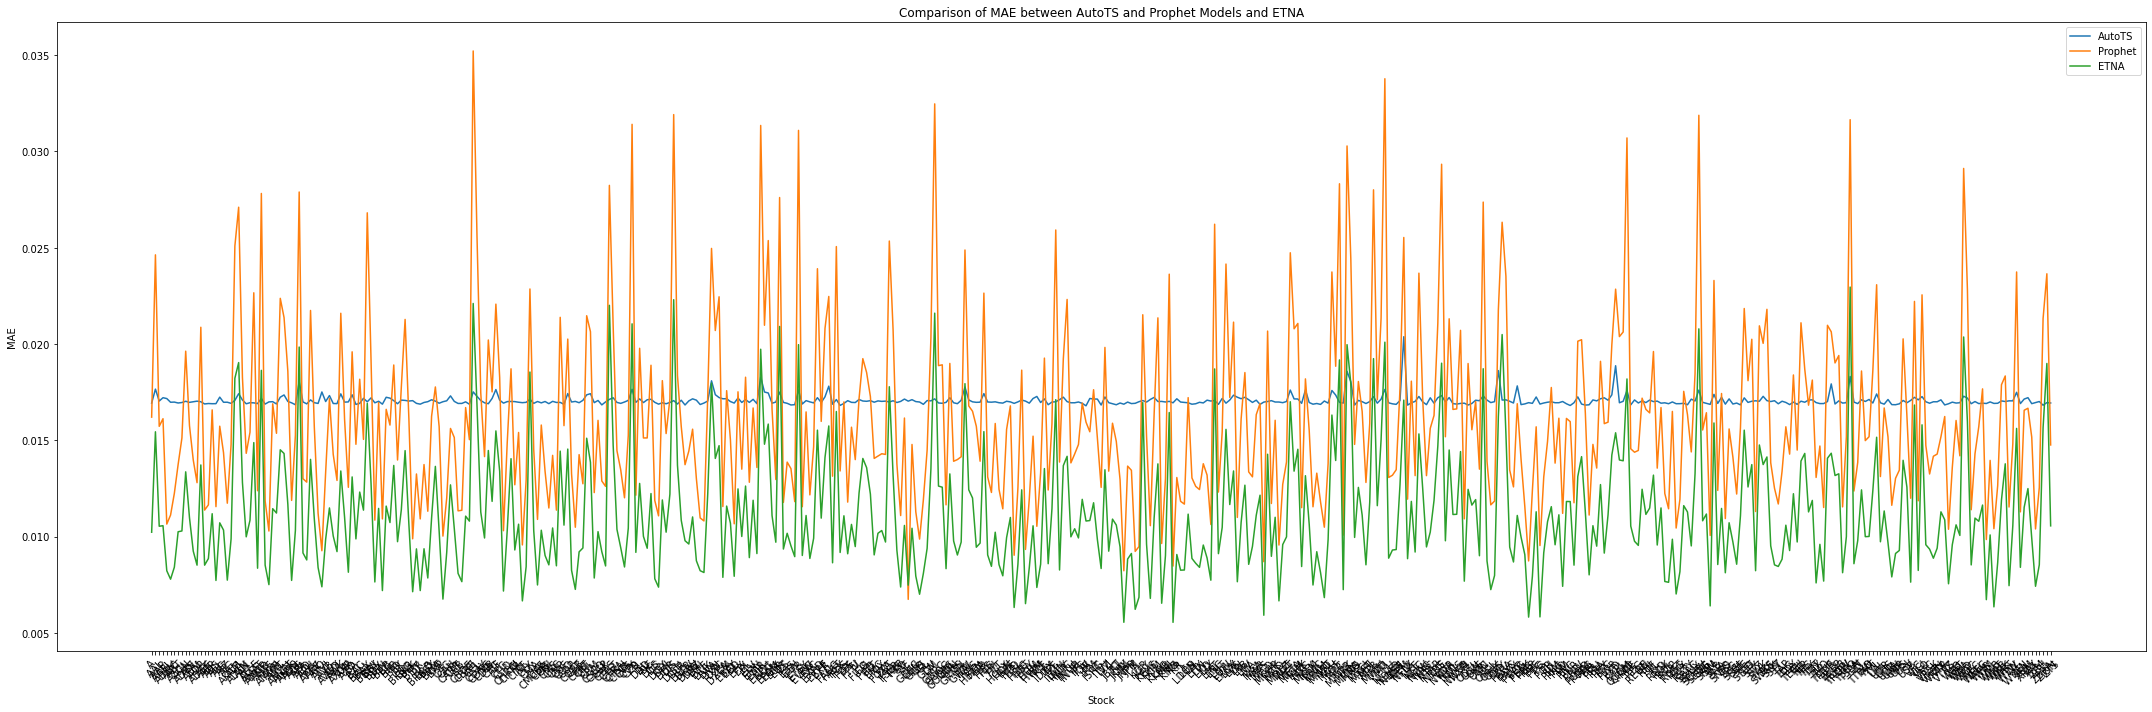

In [97]:
# Plotting MAE
plt.figure(figsize=(30, 10))
plt.plot(auto['MAE'], label='AutoTS')
plt.plot(pro['MAE'], label='Prophet')
plt.plot(ETNA['MAE'], label='ETNA')
plt.xlabel('Stock')
plt.ylabel('MAE')
plt.title('Comparison of MAE between AutoTS and Prophet Models and ETNA')
plt.legend()
plt.xticks(range(len(auto['MAE'])), rotation=45)
plt.tight_layout()
plt.show()

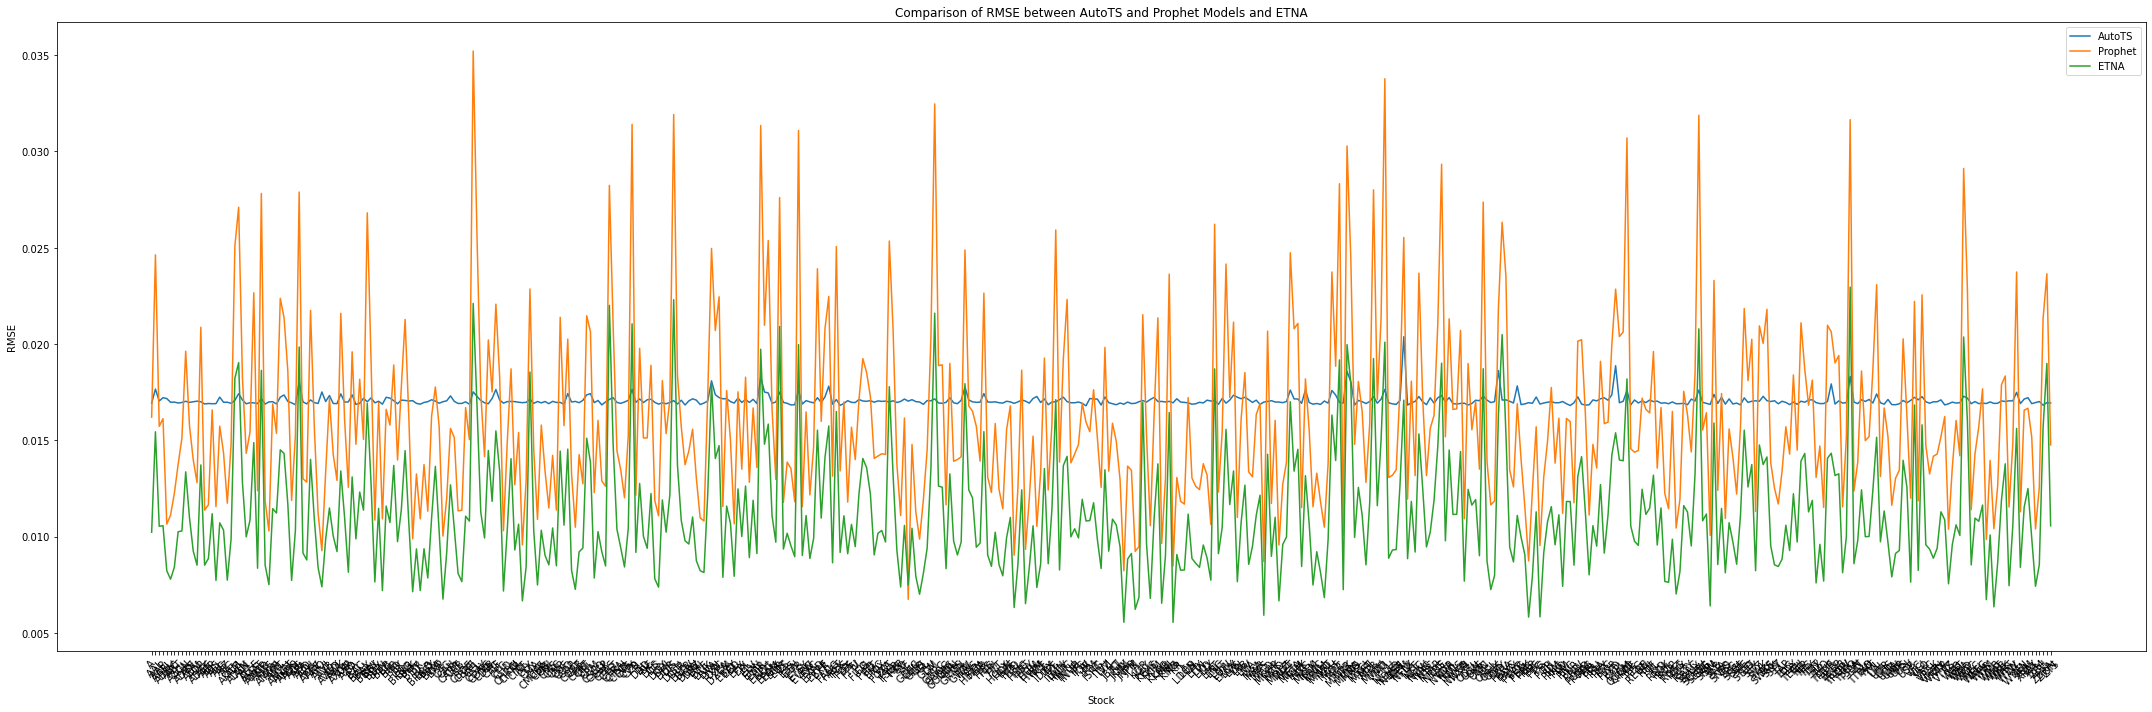

In [96]:
# Plotting RMSE
plt.figure(figsize=(30, 10))
plt.plot(auto['MAE'], label='AutoTS')
plt.plot(pro['MAE'], label='Prophet')
plt.plot(ETNA['MAE'], label='ETNA')
plt.xlabel('Stock')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between AutoTS and Prophet Models and ETNA')
plt.legend()
plt.xticks(range(len(auto['MAE'])), rotation=45)
plt.tight_layout()
plt.show()